In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from cvxopt import matrix, solvers

In [16]:
COLORS = ['red', 'blue']

x_train = np.array([[0.20, 0.20], [-0.10, 0.50], [0.30, 0.20],
                    [0.10, 0.50], [0.30, 0.10], [0.00, 0.30],
                    [0.40, 0.50], [-0.30, -0.30], [0.10, -0.40],
                    [-0.10, -0.30], [0.00, -0.50], [-0.30, -0.10],
                    [-0.50, -0.40], [-0.40, -0.20]])

y_train = np.array([1., 1., 1., 1., 1., 1., 1., -1., -1., -1., -1., -1., -1., -1.,])

x_test = np.array([
    [-0.40, 0.40], [-0.50, 0.50], [-0.40, 0.50], [-0.30, 0.40],
    [0.50, 0.00], [0.40, 0.10], [0.50, 0.40], [0.10, 0.30],
    [0.20, 0.30], [-0.30, 0.50], [0.30, 0.40], [0.10, 0.20],
    [0.50, 0.20], [-0.10, 0.30], [0.00, 0.50], [0.50, -0.50],
    [0.50, -0.40], [-0.50, 0.10], [-0.10, -0.20], [0.00, -0.30],
    [0.30, -0.30], [-0.40, -0.10], [0.30, -0.40], [0.10, -0.30],
    [0.10, -0.50], [-0.20, -0.20], [-0.30, -0.20], [-0.50, -0.10],
    [-0.40, -0.40], [-0.50, -0.50], [-0.20, -0.50], [-0.20, -0.40],
])

y_test = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,])

n_train, D = x_train.shape
n_test, _ = x_test.shape

In [19]:
def scatter_plot(ax, x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_s = x[y==unique[li]]
        ax.set_xticks(np.arange(-1, 1, 0.1))
        ax.set_yticks(np.arange(-1, 1., 0.1))
        ax.scatter(x_s[:, 0], x_s[:,1], c=COLORS[li])
        ax.grid(b=True, which='both', color='k', linestyle='-', linewidth=.1)

[[-0.3 -0.3]
 [ 0.1 -0.4]
 [-0.1 -0.3]
 [ 0.  -0.5]
 [-0.3 -0.1]
 [-0.5 -0.4]
 [-0.4 -0.2]]
[[ 0.2  0.2]
 [-0.1  0.5]
 [ 0.3  0.2]
 [ 0.1  0.5]
 [ 0.3  0.1]
 [ 0.   0.3]
 [ 0.4  0.5]]


C:\Users\rifqi\AppData\Local\Temp\ipykernel_4504\1597267379.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='both', color='k', linestyle='-', linewidth=.1)


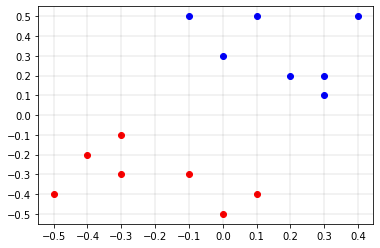

In [20]:
fig, ax = plt.subplots()
scatter_plot(ax, x_train, y_train)
plt.show()